<a href="https://colab.research.google.com/github/Rankstrait/hello-word/blob/master/HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [54]:
#Set path
path = 'drive/MyDrive/SB_practical_notebooks/data/'

In [ ]:
!pip install scipy
!pip install matplotlib
!pip install biopython

     |████████████████████████████████| 2.3 MB 6.6 MB/s 


In [ ]:
import copy
from Bio.PDB import PDBList, NeighborSearch, calc_angle, calc_dihedral, PPBuilder, is_aa
from Bio.PDB.PDBParser import PDBParser

import math 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import scipy.signal
import matplotlib.colors as mplcolors

In [ ]:
from Bio.PDB import PDBList, calc_angle, calc_dihedral, PPBuilder, is_aa
from Bio.PDB.PDBParser import PDBParser

import math
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import numpy as np

In [ ]:
#FIRST EXERCISE:

In [ ]:
def get_distance_matrix(residues, seq_sep):

    # Calculate the distance matrix
    distances = []
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            row = []
            for residue2 in residues:
                if residue2.id[0] == " ":  # Exclude hetero/water residues
                    if abs(residue1.id[1] - residue2.id[1]) >= seq_sep: #distance in residue between two atoms that  respect that inequality
                        if (residue1.has_id('CB') == True):
                          res_1 = residue1['CB']
                        else:
                          res_1 = residue1['CA']
                        if (residue2.has_id('CB') == True):
                          res_2 = residue2['CB']
                        else:
                          res_2 =residue2['CA']

                        row.append(res_1 - res_2)


                        
                    else:
                        row.append(None) # For residues not respecting sequence separation
            distances.append(row)

    return np.array(distances, dtype=float)


#########################################

In [69]:
# Fetch a PDB file to the current dir
pdbl = PDBList()

# Input
pdb_id = '2wbq'

pdbl.retrieve_pdb_file(pdb_id, pdir=path, file_format='pdb')  # Will save to pdbXXXX.ent
structure = PDBParser(QUIET=True).get_structure(pdb_id, path + "pdb{}.ent".format(pdb_id))
selected_residues = structure[0]['A']  # select chain A of first model (0)

# Calculate the contact map using the NeighborSearch module (fast)
# https://biopython.org/docs/1.75/api/Bio.PDB.NeighborSearch.html
# ns = NeighborSearch([atom for residue in selected_residues for atom in residue.get_atoms()])
# for residue1, residue2 in ns.search_all(3.5, level="R"):  # level="R" returns pairs of residues in contact considering all atoms
#    if residue1.id[0] == " " and residue2.id[0] == " ":  # Exclude hetero/water residues
#         if abs(residue1.id[1] - residue2.id[1]) > 6:  # Sequence separation > 6
#            print(residue1.id, residue2.id)


# Usually sequence separation thresholds are: 6 (short range), 12, 24 (long range)
sequence_separation = 0


dist_matrix = get_distance_matrix(selected_residues, sequence_separation)

#########################################

Structure exists: 'drive/MyDrive/SB_practical_notebooks/data/pdb2wbq.ent' 


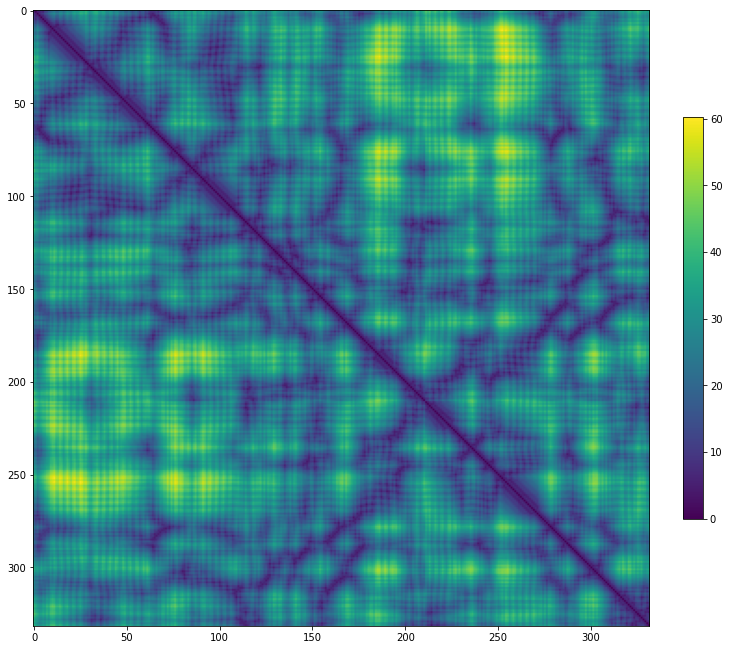

In [68]:
# Plot distance matrix

# Alter the color map to highlight nan values (the diagonal)
current_cmap = copy.copy(matplotlib.cm.get_cmap())
current_cmap.set_bad(color='white')

fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(dist_matrix) #Useful to plot color maps
fig.colorbar(im, fraction=0.03, pad=0.05)
plt.savefig(path + 'ca_distances_{}.png'.format(pdb_id), bbox_inches='tight')

In [ ]:
# SECOND EXERCISE

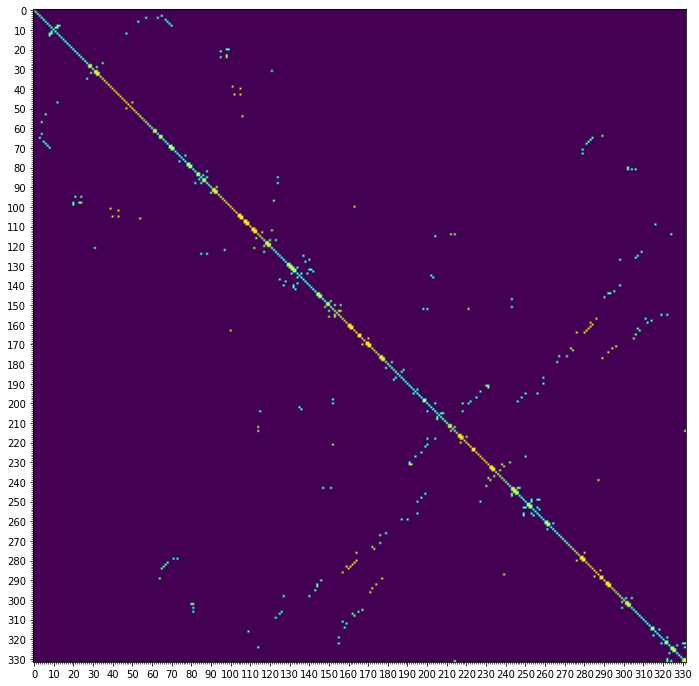

In [60]:
# Plot contact map
contact_map = (dist_matrix[:] < 5).astype(float)  #matrix of the same size of dist_matrix: value equal to 1 when the distance is below than 5, value  equal to 0 when the distance is greater than 5 
# Calculate the contact map based on a distace threshold 5 Angstrom
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(contact_map)

# Set ticks
ax.xaxis.set_major_locator(MultipleLocator(10))
ax.xaxis.set_minor_locator(AutoMinorLocator(10))
ax.yaxis.set_major_locator(MultipleLocator(10))
ax.yaxis.set_minor_locator(AutoMinorLocator(10))

plt.savefig(path + 'ca_contacts_{}.png'.format(pdb_id), bbox_inches='tight')

In [ ]:
# THIRD EXERCISE

In [82]:
#Report the number of residues in contacts for different ranges of sequence separation.
#interval [0,6]

def get_residues_in_contact(residues):    
    counter = 0
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            
            for residue2 in residues:
                if residue2.id[0] == " ":  
                  if (residue1.has_id('CB') == True):
                    res_1 = residue1['CB']
                  else:
                    res_1 = residue1['CA']

                  if (residue2.has_id('CB') == True):
                    res_2 = residue2['CB']
                  else:
                    res_2 = residue2['CA']
                  
                  result = res_1 - res_2
                  if (result <= 6):
                    counter += 1
    return counter/2



In [83]:
get_residues_in_contact(selected_residues)

949.0

In [84]:
#interval [7,12]
def get_residues_in_contact(residues):    
    counter = 0
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            
            for residue2 in residues:
                if residue2.id[0] == " ":  
                  if (residue1.has_id('CB') == True):
                    res_1 = residue1['CB']
                  else:
                    res_1 = residue1['CA']

                  if (residue2.has_id('CB') == True):
                    res_2 = residue2['CB']
                  else:
                    res_2 = residue2['CA']
                  
                  result = res_1 - res_2
                  if (result >= 7 and result <= 12):
                    counter += 1
    return counter/2

In [85]:
get_residues_in_contact(selected_residues)

3838.0

In [72]:
#interval [13,24]
def get_residues_in_contact(residues):    
    counter = 0
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            
            for residue2 in residues:
                if residue2.id[0] == " ":  
                  if (residue1.has_id('CB') == True):
                    res_1 = residue1['CB']
                  else:
                    res_1 = residue1['CA']

                  if (residue2.has_id('CB') == True):
                    res_2 = residue2['CB']
                  else:
                    res_2 = residue2['CA']
                  
                  result = res_1 - res_2
                  if (result >= 13 and result <= 24):
                    counter += 1
    return counter/2

In [73]:
get_residues_in_contact(selected_residues)

18857.0

In [74]:
#interval [25, ∞]
def get_residues_in_contact(residues):    
    counter = 0
    for residue1 in residues:
        if residue1.id[0] == " ":  # Exclude hetero/water residues
            
            for residue2 in residues:
                if residue2.id[0] == " ":  
                  if (residue1.has_id('CB') == True):
                    res_1 = residue1['CB']
                  else:
                    res_1 = residue1['CA']

                  if (residue2.has_id('CB') == True):
                    res_2 = residue2['CB']
                  else:
                    res_2 = residue2['CA']
                  
                  result = res_1 - res_2
                  if (result >= 25):
                    counter += 1
    return counter/2

In [75]:
get_residues_in_contact(selected_residues)

27922.0

In [ ]:
#FOURTH EXERCISE

In [86]:
print("Peptides")
ppb = PPBuilder()  # PolyPeptideBuilder
for model in structure: 
    for chain in model: #1 ramachandran plot for each chain
        print(chain.id, len([residue for residue in chain if is_aa(residue)])) #for avoid gaps in the middle
        for pp in ppb.build_peptides(chain): #for each peptide in chain
            print(len(pp), pp.get_sequence())


Peptides
A 332
211 VRPWSEFRLTPAEAAAAAALAARCAQRYDETDGPEFLLDAPVIAHELPKRLRTFMARARLDAWPHALVVRGNPVDDAALGSTPVHWRTARTPGSRPLSFLLMLYAGLLGDVFGWATQQDGRVVTDVLPIKGGEHTLVSSSSRQELGWHTEDAFSPYRADYVGLLSLRNPDGVATTLAGVPLDDLDERTLDVLFQERFLIRPDDSHLQVNNS
121 GRVEFEGIAQAADRPEPVAILTGHRAAPHLRVDGDFSAPAEGDEEAAAALGTLRKLIDASLYELVLDQGDVAFIDNRRAVHGRRAFQPRYDGRDRWLKRINITRDLHRSRKAWAGDSRVLG


In [ ]:
# Calculate PSI and PHI
rama = {}  # { chain : [[residue_1, ...], [phi_residue_1, ...], [psi_residue_2, ...] ] }
for model in structure:
    for chain in model:
        for pp in ppb.build_peptides(chain):

            phi_psi = pp.get_phi_psi_list()  # [(phi_residue_1, psi_residue_1), ...] get the phi an psi for residue specified
            for i, residue in enumerate(pp):
                print(model, chain, i, residue, phi_psi[i])

                # Convert radians to degrees and remove first and last value that are None
                if phi_psi[i][0] is not None and phi_psi[i][1] is not None:
                    rama.setdefault(chain.id, [[], [], []])
                    rama[chain.id][0].append(residue)
                    rama[chain.id][1].append(math.degrees(phi_psi[i][0]))
                    rama[chain.id][2].append(math.degrees(phi_psi[i][1]))


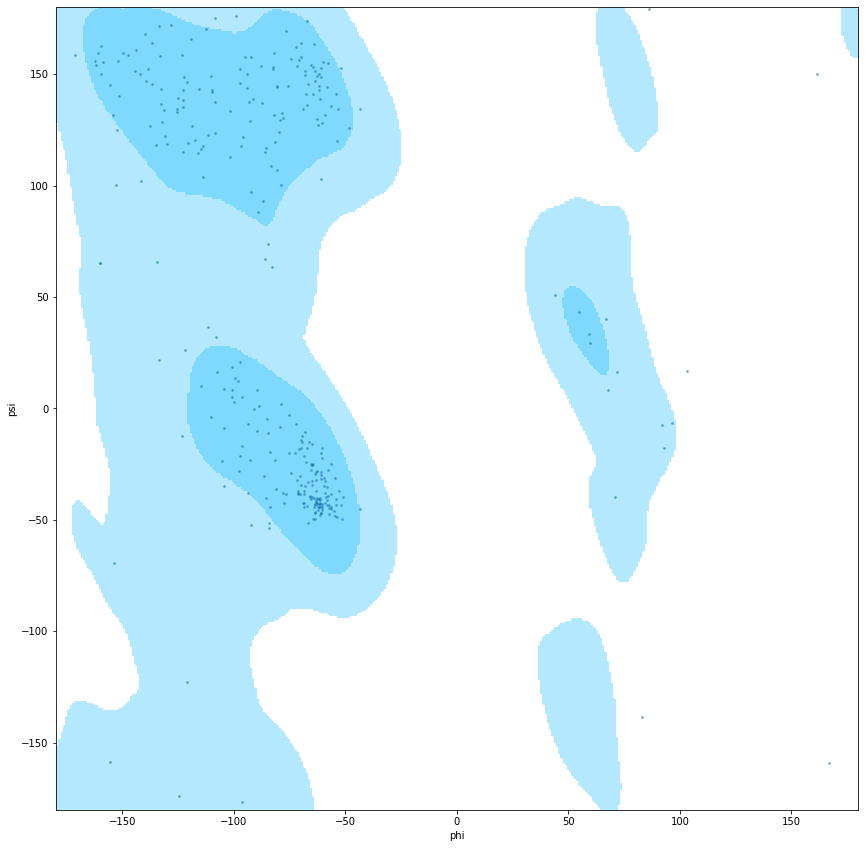

In [88]:
# Ramachandran regions
# 2 = 90%, 1 = 60%
regions_matrix = []
with open(path + "ramachandran.dat") as f:
    for line in f:
        if line:
            regions_matrix.append([int(ele) for ele in line.strip().split()])

# Plot Ramachandran regions
cmap = mplcolors.ListedColormap(['#FFFFFF', '#B3E8FF', '#7FD9FF'])

f, axes = plt.subplots(1, len(rama), figsize=(12, 12))
axes = np.array(axes).reshape(-1)  # Hack to give consistency for single/multiple suplots (-1 force reshape to infer dimensions)
for ax, chain_id in zip(axes, rama): #iterate for each chain of our protein

    # Plot regions (60 percentile & 90 percentile)
    im = ax.imshow(regions_matrix, cmap=cmap, extent=(-180, 180, -180, 180))

    # Plot points
    ax.scatter(rama[chain_id][1], rama[chain_id][2], s=3, alpha=0.5)

    ax.set_xlabel('phi')
    ax.set_ylabel('psi')

plt.tight_layout()  # Remove figure padding
plt.savefig(path +'ramachandran_regions.png', bbox_inches='tight')

In [ ]:
# 5TH EXERCISE (NOT WORKING) WE WILL COUNT THE OUTLAYER MANUALLY

In [57]:
counter = 0
for i in range(len(rama[chain.id][1])):
  coord_1 = int(rama[chain.id][1][i])
  coord_2 = int(rama[chain.id][2][i])

  if regions_matrix[coord_1][coord_2] == 0:
    counter += 1

print(counter)

260
